<a href="https://colab.research.google.com/github/joaovvitor/shabel_model/blob/master/sim/Shabel_netpyne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up the simulation

In [1]:
%pwd
# Checking the current folder location within the virtual machine
%cd /content/
%pwd

/content


'/content'

In [2]:
# Installing the required packages
%pip install neuron
%pip install netpyne 
# Importing the required libraries
import matplotlib   # for ploting 
import os           # for navigation and operations outside python
import json         # for data handling

     |████████████████████████████████| 12.6 MB 189 kB/s 
     |████████████████████████████████| 312 kB 27.7 MB/s 


In [3]:
# Making sure that there is no previous instance of the project folder
if os.path.isdir('/content/shabel_model'):
  print('here')
  %ls
  %rm -r /content/shabel_model
  %ls



In [4]:
# Cloning the project folder from github
!git clone https://github.com/joaovvitor/shabel_model.git

Cloning into 'shabel_model'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 39 (delta 6), reused 36 (delta 3), pack-reused 0
Unpacking objects: 100% (39/39), done.


In [ ]:
# Changing current folder to the project
%cd /content/shabel_model/sim

%rm -r /content/shabel_model/mod/x86_64
!ln -s /content/shabel_model/mod/x86_64 x86_64
%cd /content/shabel_model/mod
!nrnivmodl
%cd /content/shabel_model/sim


%pwd

# Debugging sections

Run this section if you have previously ran the 'data/init_sim'


In [ ]:
%cd /content/shabel_model/
if os.path.isdir('/content/shabel_model/data/init_sim/'):
  %rm -r /content/shabel_model/data/init_sim/
  print("sim data removed")

In [ ]:
!python3 -i /content/shabel_model/sim/netParams.py

In [ ]:
!python3 -i /content/shabel_model/sim/cfg_file.py

# Runnuing an Init Sim

In [ ]:
%cd /content/shabel_model/sim
!python3 init.py

/content/shabel_model/data/CoCell
CoCell_batch_tutorial_shape.png  CoCell_batch_tutorial_traces.png
CoCell_batch_tutorial_traces.png


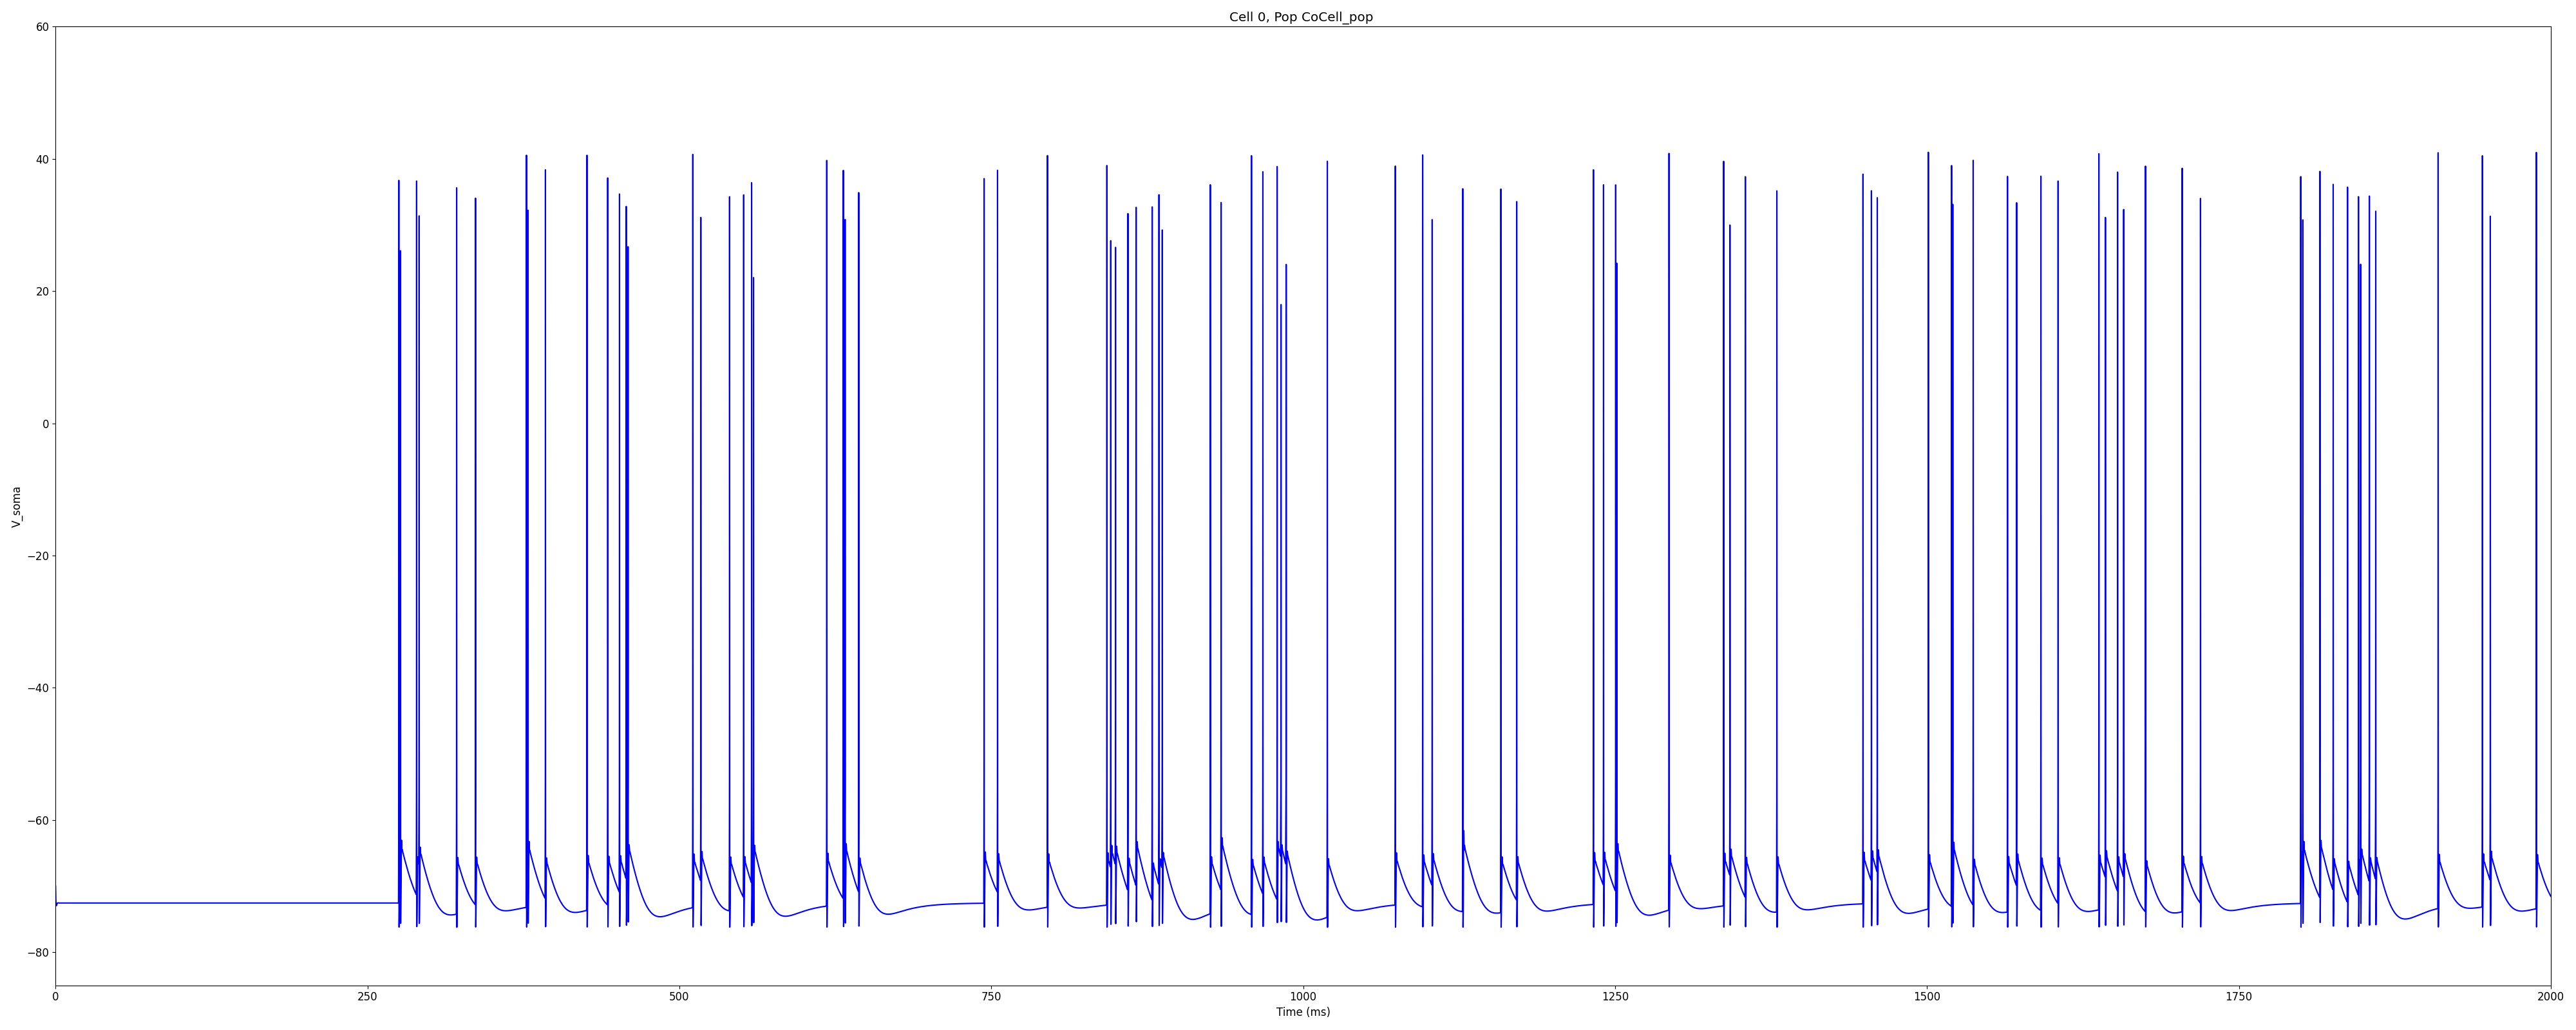

In [10]:
%cd /content/shabel_model/data/CoCell/
import os           # for navigation and operations outside python
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/shabel_model/data/CoCell/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()

%pwd
%ls
 
for i in list_of_files:
  print(i)
  display(Image(i))
  # display(Image(i, width=800, height=800))

# Running the Batch simulation

In [ ]:
from netpyne import specs, sim
%matplotlib inline
from netpyne import specs
from netpyne.batch import Batch
import numpy as np

def changeNetStims():
        # Create variable of type ordered dictionary (NetPyNE's customized version)
        params = specs.ODict()

        # fill in with parameters to explore and range of values (key has to coincide with a variable in simConfig)
        params['netWeight']=[0.0005, 0.0010, 0.0025]
        params['interStimInterval']=[5, 2.5, 1, 0.5, 0.1]

        initCfg={}
        initCfg['verbose']=True

        # create Batch object with parameters to modify, and specifying files to use
        b = Batch(params=params, cfgFile='/content/shabel_model/sim/cfg_file.py', netParamsFile='/content/shabel_model/sim/netParams.py',initCfg=initCfg)

        # Set output folder, grid method (all param combinations), and run configuration
        b.batchLabel = 'NetStims'
        b.saveFolder = '/content/shabel_model/data/init_sim'
        b.method = 'grid'
        b.runCfg = {'type': 'mpi_bulletin',
                            'script': 'tut8_init.py',
                            'skip': True}

        # Run batch simulations
        b.run()

# Main code
%cd /content/shabel_model/
%pwd
if __name__ == '__main__':
        changeNetStims()

# NetStims data

In [ ]:
%cd /content/shabel_model/data/init_sim/

In [ ]:
import os           # for navigation and operations outside python
# to open images in colab
from IPython.display import Image, display

list_of_files=[]
# Get .png files
for f_name in os.listdir('/content/shabel_model/data/init_sim/'):
  if f_name.endswith('traces.png'):
    list_of_files.append(f_name)
list_of_files.sort()

%pwd
%ls

for i in list_of_files:
  print(i)
  display(Image(i, width=500, height=500))

In [ ]:
%cd /content/shabel_model

/content/tut8_batch_exercises


In [ ]:
%pwd

'/content/tut8_batch_exercises'